In [2]:
import matplotlib.pyplot as plt
import numpy as np
import spectral as sp
import cv2

In [3]:
# Load the hyperspectral image
image_path = 'C:\TomatoSeedTomer\Tori_Seed_Unpolish_Infected_Tobamo_S2_Vnir__T12_2022-08-28_11-23-17\capture\Tori_Seed_Unpolish_Infected_Tobamo_S2_Vnir__T12_2022-08-28_11-23-17.hdr'  # Replace with your file path

img = sp.envi.open(image_path)
data = img.load()

print("Image shape (rows, columns, bands):", data.shape)
print("Wavelengths:", img.bands.centers)  # If wavelengths are available

c:\Users\sagig\AppData\Local\Programs\Python\Python310\lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Image shape (rows, columns, bands): (3000, 1600, 840)
Wavelengths: [395.68, 396.37, 397.06, 397.76, 398.45, 399.14, 399.84, 400.53, 401.22, 401.92, 402.61, 403.31, 404.0, 404.69, 405.39, 406.08, 406.78, 407.47, 408.17, 408.86, 409.55, 410.25, 410.94, 411.64, 412.33, 413.03, 413.72, 414.42, 415.11, 415.81, 416.5, 417.2, 417.9, 418.59, 419.29, 419.98, 420.68, 421.37, 422.07, 422.77, 423.46, 424.16, 424.85, 425.55, 426.25, 426.94, 427.64, 428.34, 429.03, 429.73, 430.43, 431.13, 431.82, 432.52, 433.22, 433.91, 434.61, 435.31, 436.01, 436.7, 437.4, 438.1, 438.8, 439.5, 440.19, 440.89, 441.59, 442.29, 442.99, 443.69, 444.39, 445.08, 445.78, 446.48, 447.18, 447.88, 448.58, 449.28, 449.98, 450.68, 451.38, 452.08, 452.77, 453.47, 454.17, 454.87, 455.57, 456.27, 456.97, 457.67, 458.37, 459.07, 459.77, 460.48, 461.18, 461.88, 462.58, 463.28, 463.98, 464.68, 465.38, 466.08, 466.78, 467.48, 468.19, 468.89, 469.59, 470.29, 470.99, 471.69, 472.4, 473.1, 473.8, 474.5, 475.2, 475.91, 476.61, 477.31, 47

In [5]:
def display_band(band):
    plt.imshow(band, cmap='gray')
    plt.title(f'Band')
    plt.colorbar()
    plt.show()

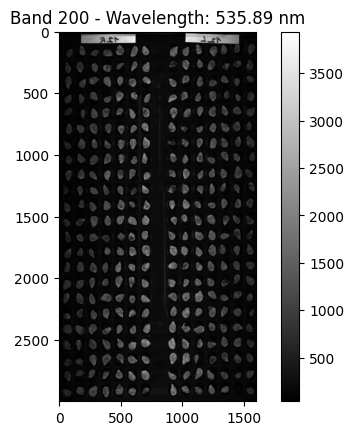

In [4]:
band_200 = data[:, :, 200].copy().squeeze()

plt.imshow(band_200, cmap='gray')
plt.title(f'Band {200} - Wavelength: {img.bands.centers[200]} nm')
plt.colorbar()
plt.show()

Find seeds using cv2.

300


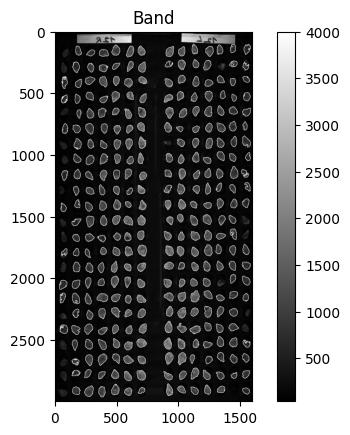

In [46]:
band_copy = band_200.copy()

normalized_image = cv2.normalize(band_200, None, 0, 255, cv2.NORM_MINMAX)
image_uint8 = normalized_image.astype(np.uint8)

# Threshold the image to get a binary image
threshold = 500
_, binary_image = cv2.threshold(image_uint8, int(threshold * 255 / 4096), 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 1500
max_area = 6000
filtered_contours = [contour for contour in contours if min_area <= cv2.contourArea(contour) <= max_area]

cv2.drawContours(band_copy, filtered_contours, -1, (4000), 2)

print(len(filtered_contours))
display_band(band_copy)
